In [46]:
# load and summarize the dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn.metrics import roc_auc_score, roc_curve
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

import scikitplot as skplt

In [47]:
df = pd.read_csv('newtest.csv')

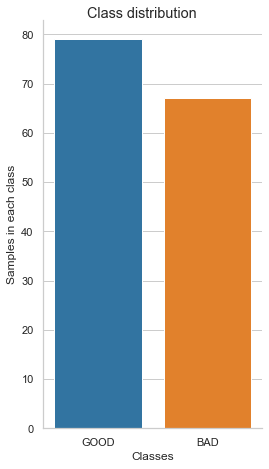

In [48]:
g = sns.catplot(x = 'CLASS' , data = df, kind = 'count', height = 6.5, aspect = 0.57 )
g.fig.suptitle('Class distribution', y = 1.0)
g.set(xlabel = 'Classes', ylabel ='Samples in each class')
plt.show()

In [49]:
X = df.drop(['CLASS', 'LIQUOR ITEM', 'Class'], axis = 1)
X = X.astype(str)
y = df.CLASS

In [50]:
Ord_model = pickle.load(open('Ordinal.sav', 'rb'))

In [51]:
lab_model = pickle.load(open('Ordinallab.sav', 'rb'))

In [52]:
X_enc = Ord_model.transform(X)

In [53]:
y_enc = lab_model.transform(y)

In [54]:
searcher = pickle.load(open('finalized_model.sav', 'rb'))

In [74]:
y_pred = searcher.predict(X_enc)
y_prob = searcher.predict_proba(X_enc)[:,1]
print("Test accuracy ", searcher.score(X_enc, y_enc))
print(classification_report(y_enc,y_pred))
print(confusion_matrix(y_enc, y_pred))
print(log_loss(y_enc, y_prob))
fpr, tpr, thresholds = roc_curve(y_enc, y_prob)
roc_auc = roc_auc_score(y_enc, y_prob)
print("AUC of ROC Curve:", roc_auc)

Test accuracy  0.8972602739726028
              precision    recall  f1-score   support

           0       1.00      0.78      0.87        67
           1       0.84      1.00      0.91        79

    accuracy                           0.90       146
   macro avg       0.92      0.89      0.89       146
weighted avg       0.91      0.90      0.90       146

[[52 15]
 [ 0 79]]
0.20049870585790866
AUC of ROC Curve: 0.9901757037596826


In [57]:
type(fpr)

numpy.ndarray

In [58]:
fpr

array([0.        , 0.        , 0.        , 0.01492537, 0.01492537,
       0.04477612, 0.04477612, 0.07462687, 0.07462687, 0.11940299,
       0.11940299, 0.20895522, 0.20895522, 0.6119403 , 0.64179104,
       1.        ])

In [59]:
tpr

array([0.        , 0.01265823, 0.82278481, 0.82278481, 0.89873418,
       0.89873418, 0.93670886, 0.93670886, 0.97468354, 0.97468354,
       0.98734177, 0.98734177, 1.        , 1.        , 1.        ,
       1.        ])

In [60]:
fpr_list = list(fpr)

In [63]:
tpr_list = list(tpr)

In [65]:
make_dict = {'FPR':fpr_list, 'TPR':tpr_list}

In [67]:
df_dict = pd.DataFrame(make_dict)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


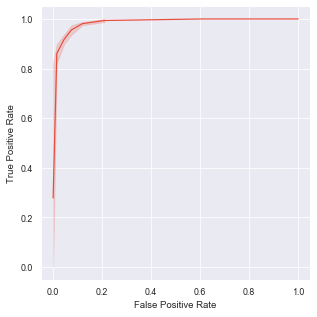

In [94]:
fatui = ["#e74c3c", "#34495e"]
sns.set_style('darkgrid')
sns.set_palette(fatui)
sns.set_context('paper')
g = sns.relplot(x = 'FPR', y= 'TPR', data= df_dict, kind = 'line', height = 4.5, aspect = 1)
g.set(xlabel = 'False Positive Rate', ylabel ='True Positive Rate')
plt.savefig('Roc test.eps', format='eps')
plt.show()

In [100]:
xbar = ['Basic Logistic Regression', 'Tuned Logistic Regression', 'Basic SVM', 'Tuned SVM', 'Final Model']

In [122]:
ybar = [89.1, 90.0, 90.0, 93.33, 90.1]

In [123]:
make_dict_acc = {'algo':xbar, 'accuracy':ybar}

In [124]:
make_dict_acc

{'algo': ['Basic Logistic Regression',
  'Tuned Logistic Regression',
  'Basic SVM',
  'Tuned SVM',
  'Final Model'],
 'accuracy': [89.1, 90.0, 90.0, 93.33, 90.1]}

In [125]:
df_acc = pd.DataFrame(make_dict_acc)

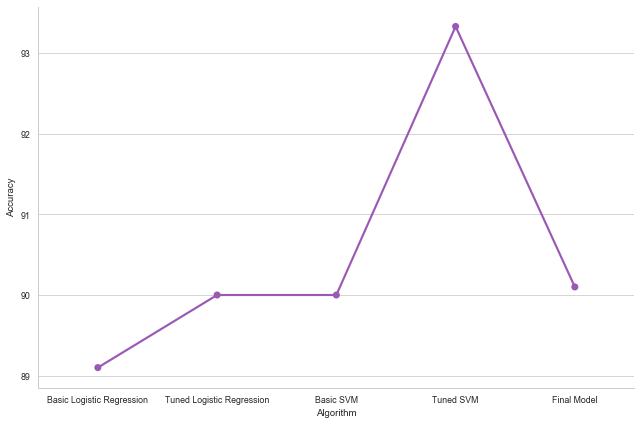

In [126]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_style('whitegrid')
sns.set_palette(flatui)
sns.set_context('paper')

g = sns.catplot(x = 'algo', y = 'accuracy' , data = df_acc, kind = 'point', join = True, height = 6, aspect = 1.5)
g.set(xlabel = 'Algorithm', ylabel ='Accuracy')
plt.savefig('Accuracy.eps', format='eps')
plt.show()